In [1]:
# Activity 2: Singular Value Decomposition

In [2]:
import numpy as np

def sse_score(X, X_hat):
    return np.sum((X - X_hat)**2)

In [3]:
X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat) # -> 0.09879

In [4]:
def svm(A): 
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    return U, np.diag(S), Vt

In [5]:
X = np.array([[1, 2], [3, 4]])
U, S, Vt = svm(X)  

In [6]:
U

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])

In [7]:
S

array([[5.4649857 , 0.        ],
       [0.        , 0.36596619]])

In [8]:
Vt

array([[-0.57604844, -0.81741556],
       [ 0.81741556, -0.57604844]])

In [9]:
def reconstruct(U, S, Vt):
    #X_hat = U @ (S @ Vt) using numpy that is to say: multiply matrix U by the product of diagonal matrix S and transpose of matrix V
    X_hat = np.dot(U, np.dot(S, Vt))
    return X_hat

In [10]:
        U = np.array([[-0.40455358, -0.9145143 ],
                      [-0.9145143 ,  0.40455358]])
        S = np.array([[5.4649857 , 0.        ],
                      [0.        , 0.36596619]])
        Vt = np.array([[-0.57604844, -0.81741556],
                       [ 0.81741556, -0.57604844]])
        X_hat = reconstruct(U, S, Vt)

In [11]:
print (X_hat)

[[0.99999999 1.99999998]
 [3.00000003 4.00000001]]


In [12]:
sse = sse_score(X, X_hat)

C:\Users\Toni\AppData\Local\Temp\ipykernel_27196\969300423.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  A = misc.face(gray=True)


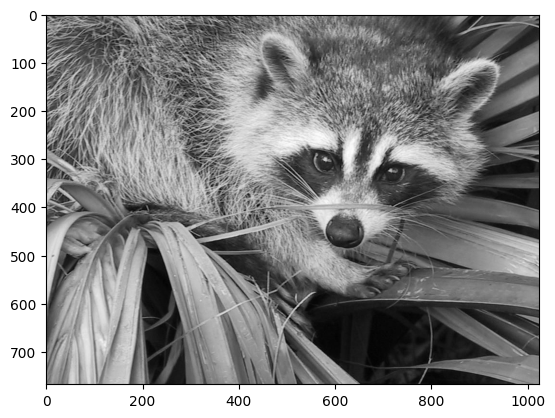

In [13]:
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [14]:
def img_to_matrix(img):
    return np.array(img).astype(float)

In [15]:
X = np.array(A)

In [16]:
print (X)

[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]


In [17]:
U, S, Vt = svm(X)

In [18]:
print (U)
print (S)
print (Vt)

[[ 0.03178047  0.01899494  0.01767694 ... -0.00515354 -0.02000072
  -0.00536943]
 [ 0.03188899  0.01772787  0.01609502 ...  0.01819321  0.05044649
  -0.00025865]
 [ 0.03273099  0.01230324  0.01228203 ... -0.00532875 -0.05318634
   0.00289746]
 ...
 [ 0.03034585 -0.03641649  0.00249968 ...  0.04908979 -0.07563333
   0.08396142]
 [ 0.03011329 -0.03554472  0.00048348 ... -0.03926725  0.07966796
  -0.03974808]
 [ 0.03001502 -0.0346442  -0.00087503 ...  0.01853222 -0.03471804
   0.00336473]]
[[1.03201724e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.16102403e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.60637957e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.12509318e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.04676096e+00 0.00000000e+00]
 [0.0000

In [19]:
U, s, Vt = svm(X)
r = S.shape[0]

print("The maximum value of r is: ", r)
# U - (m x r)
for n_components in range(1, r+1):
    print(n_components)
    U_reduced = U[:, :n_components] # m x r
    S_reduced = S[:n_components, :n_components] # r x r
    Vt_reduced = Vt[:n_components, :] # r x n
    
    # Reconstruct matrix
    X_hat_reconstructed = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))
    
    # Reconstruction error
    SSE = np.sum((X - X_hat_reconstructed)**2)
    
    # Compression ratio m × r + r + r × n
    comp_ratio = (X.shape[1]*n_components + n_components + n_components*X.shape[0]) / (X.shape[1] * X.shape[0])
    
    print("Number of components: ", n_components)
    print("\n Reconstructed X: \n", np.round(X_hat_reconstructed, 2))
    print("\n X: \n", X)
    print("\n SSE: ", SSE)
    print("\n Compression ratio: ", comp_ratio)
    print('\n-------------------------------------------------') 

The maximum value of r is:  768
1
Number of components:  1

 Reconstructed X: 
 [[117.73 117.55 117.54 ...  87.49  87.76  87.88]
 [118.13 117.96 117.94 ...  87.78  88.06  88.18]
 [121.25 121.07 121.06 ...  90.1   90.39  90.51]
 ...
 [112.41 112.25 112.24 ...  83.54  83.8   83.91]
 [111.55 111.39 111.38 ...  82.9   83.16  83.27]
 [111.19 111.02 111.01 ...  82.63  82.89  83.  ]]

 X: 
 [[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]

 SSE:  1831836489.9867504

 Compression ratio:  0.0022799173990885415

-------------------------------------------------
2
Number of components:  2

 Reconstructed X: 
 [[111.44 111.77 112.32 ...  76.94  77.18  77.3 ]
 [112.26 112.56 113.07 ...  77.95  78.18  78.3 ]
 [117.17 117.33 117.68 ...  83.27  83.53  83.65]
 ...
 [124.47 123.33 122.25 ... 103.75 104.09 104.2 ]
 [123.32 122.21 121.15 ... 102.62 102.96 103.07]
 

In [20]:
def matrix_to_img(matrix, shape):
    img = matrix.reshape(shape)
    img -= np.min(img)
    img = (img / np.max(img)) * 256
    return img.astype(np.uint8)

In [21]:
def image_compression(A, n_components):
    # Perform SVD
    U, S, Vt = svm(A)
    
    # Reduce dimensionality
    U_reduced = U[:, :n_components] # m x r
    S_reduced = S[:n_components, :n_components] # r x r
    Vt_reduced = Vt[:n_components, :] # r x n
    
    # Reconstruct matrix
    A_hat_reconstructed = reconstruct(U_reduced, S_reduced, Vt_reduced)
    
    # Calculate reconstruction error
    sse = sse_score(A, A_hat_reconstructed)
    
    # Calculate compression ratio
    comp_ratio = (n_components * (A.shape[0] + A.shape[1]) + n_components) / (A.shape[0] * A.shape[1])
    
    # Convert reconstructed matrix to image
    A_hat_reconstructed = matrix_to_img(A_hat_reconstructed, A.shape)
    
    # Plot original and reconstructed image
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].imshow(A, cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(A_hat_reconstructed, cmap='gray')
    axes[1].set_title('Reconstructed')
    plt.show()

    # Print reconstruction error and compression ratio
    print("Reconstruction error: ", sse)
    print("Compression ratio: ", comp_ratio)

    return A_hat_reconstructed, sse, comp_ratio

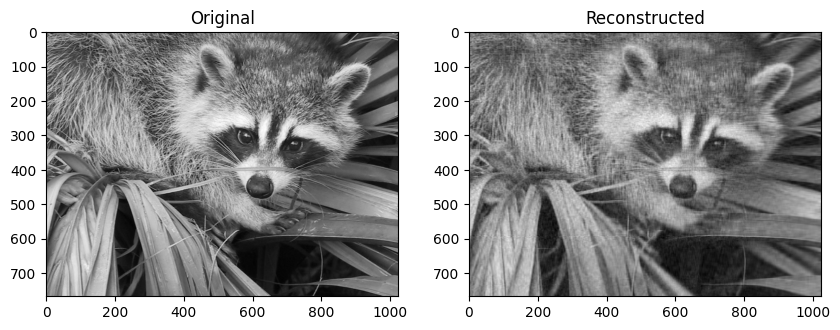

Reconstruction error:  195489946.21017024
Compression ratio:  0.11399586995442708


In [22]:
A_hat, sse, comp_ratio = image_compression(A,50)

In [23]:
#Extra slider to prove 1.6
import ipywidgets as widgets

def update_image(n_components):
    
    # Compress image
    A_hat_reconstructed, sse, comp_ratio = image_compression(A, n_components)

# Widget creator
n_components_slider = widgets.IntSlider(min=1, max=r, step=10, value=100, description="Components")

# Link slider to the function
widgets.interact(update_image, n_components=n_components_slider)


interactive(children=(IntSlider(value=100, description='Components', max=768, min=1, step=10), Output()), _dom…

<function __main__.update_image(n_components)>